In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
             'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class',]
df = pd.read_csv('magic04.data', names=col_names)
df.head()
df.shape

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


(19020, 11)

In [4]:
df['class'] = (df['class'] == 'g').astype(int)
df['class'].unique()

array([1, 0])

In [5]:
train, valid, test = np.split(df.sample(frac=1, random_state=1), [int(len(df)*.6), int(len(df)*.8)])

train.shape, valid.shape, test.shape

c:\Users\k26ra\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((11412, 11), (3804, 11), (3804, 11))

In [6]:
def scale_oversample(df, oversample=False):
  from sklearn.preprocessing import StandardScaler
  from imblearn.over_sampling import RandomOverSampler

  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,   y = ros.fit_resample(X, y)

  data = np.hstack((X, y.reshape((-1, 1))))
  return data, X, y


train_scaled, train_X, train_y = scale_oversample(train, oversample=True)
valid_scaled, valid_X, valid_y = scale_oversample(valid)
test_scaled, test_X, test_y = scale_oversample(test)

train_scaled.shape, train_X.shape, train_y.shape
valid_scaled.shape, valid_X.shape, valid_y.shape
test_scaled.shape, test_X.shape, test_y.shape

((14694, 11), (14694, 10), (14694,))

((3804, 11), (3804, 10), (3804,))

((3804, 11), (3804, 10), (3804,))

In [7]:
train.shape
train_scaled.shape

sum(train['class'] == 1)  # gamma
sum(train['class'] == 0)

sum(train_y == 1)  # gamma
sum(train_y == 0)

(11412, 11)

(14694, 11)

7347

4065

np.int64(7347)

np.int64(7347)

# kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=101)

In [10]:
y_pred = knn.predict(test_X)
y_pred  # predicted
test_y  # actual

print(classification_report(test_y, y_pred))

array([0, 1, 0, ..., 1, 1, 0])

array([0, 0, 0, ..., 1, 1, 1])

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1294
           1       0.86      0.89      0.88      2510

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB()

In [13]:
y_pred = nb.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1294
           1       0.75      0.90      0.82      2510

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression()

In [16]:
y_pred = lr.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1294
           1       0.85      0.82      0.83      2510

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svc = SVC()
svc.fit(train_X, train_y)

SVC()

In [19]:
y_pred = svc.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1294
           1       0.89      0.90      0.89      2510

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [21]:
nn_model = Sequential([
    Input(shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

nn_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

In [38]:
history = nn_model.fit(train_X, train_y, epochs=20, batch_size=32, validation_split=.2, verbose=False)

In [39]:
history.history.keys()
type(history.history['accuracy']), len(history.history['accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

(list, 20)

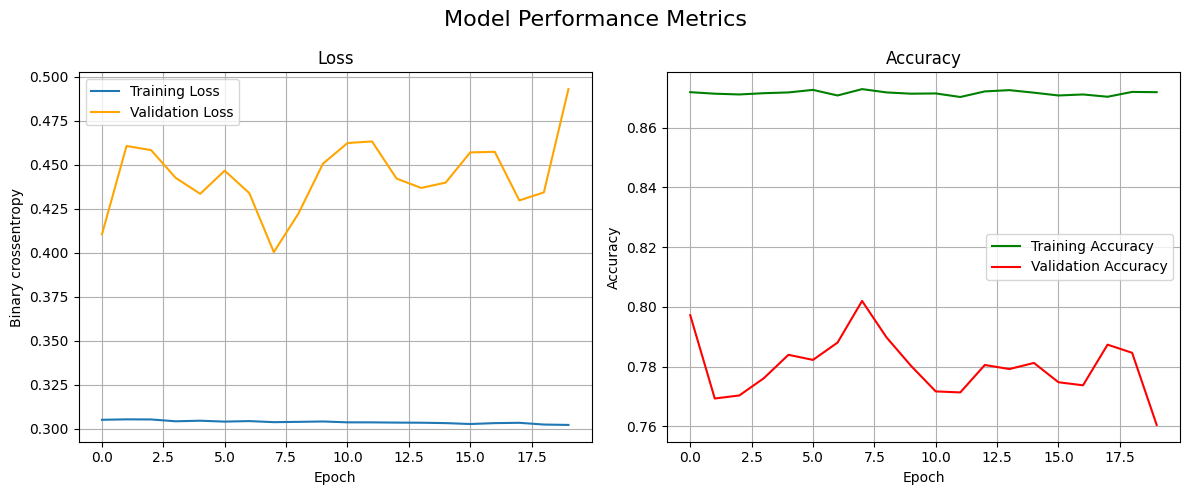

In [46]:
def plot_history(history):
  # Create a 1x2 grid of subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle('Model Performance Metrics', fontsize=16)

  # Plot training & validation loss on ax1
  ax1.plot(history.history['loss'], label='Training Loss')
  ax1.plot(history.history['val_loss'], label='Validation Loss', color='orange')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.set_title('Loss')
  ax1.legend()
  ax1.grid(True)

  # Plot training & validation accuracy on ax2
  ax2.plot(history.history['accuracy'], label='Training Accuracy', color='green')
  ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Accuracy')
  ax2.legend()
  ax2.grid(True)

  # Adjust layout to prevent overlapping titles/labels
  plt.tight_layout()


plot_history(history)